<a href="https://colab.research.google.com/github/tr3nt-tayl0r/CIMIS/blob/main/NDVI_vs_RelHumidity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tr3nt-tayl0r/CIMIS.git

Cloning into 'CIMIS'...
remote: Enumerating objects: 10857, done.
remote: Counting objects: 100% (396/396), done.
remote: Compressing objects: 100% (364/364), done.
remote: Total 10857 (delta 35), reused 386 (delta 32), pack-reused 10461 (from 1)
Receiving objects: 100% (10857/10857), 654.94 MiB | 9.44 MiB/s, done.
Resolving deltas: 100% (2214/2214), done.
Updating files: 100% (4030/4030), done.


In [2]:
import glob
import os
import sys
import datetime
import numpy as np
import pandas as pd
import json
import requests
import datetime
import matplotlib.pyplot as plt
from google.colab import userdata
!pip install cartopy
import cartopy
import geopandas as gpd
!pip install refet
import math
import refet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 99.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for refet: filename=refet-0.4.2-py3-none-any.whl size=19274 sha256=d684aec98732a90d00e1dd7c6496f94cdc25468cc4a8deba985c7fda2e90f75d
  Stored in directory: /root/.cache/pip/wheels/ab/55/da/7ed6e47f6fa1135fcdef373db6f974fd7515ee8e86c9662e88
Successfully built refet


rh_mean, 2003: 44.75
rh_mean, 2004: 46.62222222222222
rh_mean, 2005: 41.54347826086956
rh_mean, 2006: 42.58695652173913
rh_mean, 2007: 41.72527472527472
rh_mean, 2008: 38.34782608695652
rh_mean, 2009: 37.91304347826087
rh_mean, 2010: 37.70652173913044
rh_mean, 2011: 45.90217391304348
rh_mean, 2012: 36.43478260869565
rh_mean, 2013: 38.55434782608695
rh_mean, 2014: 33.391304347826086
rh_mean, 2015: 36.15217391304348
rh_mean, 2016: 30.467391304347824
rh_mean, 2017: 37.20652173913044
rh_mean, 2018: 40.119565217391305
rh_mean, 2019: 41.5
rh_mean, 2020: 41.05434782608695
rh_mean, 2021: 36.43478260869565
rh_mean, 2022: 34.358695652173914
rh_mean, 2023: 42.26373626373626
rh_mean, 2024: 36.8974358974359


<ipython-input-36-bb17292316ac>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jja.loc[:,'RHavg_mean'] = rh_mean
<ipython-input-36-bb17292316ac>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jja.loc[:,'NDVI_mean'] = ndvi_mean
<ipython-input-36-bb17292316ac>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap

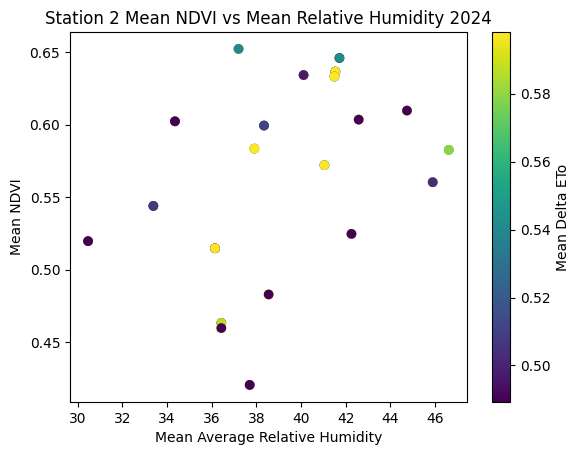

In [36]:
import matplotlib.cm as cm

dir = '/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/'

#station_ids = [2, 6, 7, 12, 13, 15, 35, 39, 41, 43, 44, 47, 52, 64, 68, 70, 71, 75, 77, 78, 80, 83, 84, 87, 90, 91, 99, 104, 105, 106, 107, 113, 114, 117, 124, 125, 126, 129, 131, 140, 144, 146, 147, 150, 151, 152, 153, 157, 158, 160, 163, 165, 170, 171, 173, 174, 175, 178, 179, 181, 182, 184, 187, 191, 192, 193, 194, 195, 197, 199, 200, 202, 204, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 229, 235, 236, 237, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 256, 258, 259, 260, 261, 262, 264, 265, 266, 267, 268]
station_ids = [2]

for id in station_ids:
  plt.figure()
  file = f'{dir}station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(file)
  df['Date'] = pd.to_datetime(df['Date'])
  df.set_index(pd.to_datetime(df.Date), inplace=True)

  for year in range(2003,2025):

    df_jja = df[((df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8)) & (df['Date'].dt.year == year)]

    rh_mean = df_jja['RHavg'].mean()
    print(f'rh_mean, {year}: {rh_mean}')
    df_jja.loc[:,'RHavg_mean'] = rh_mean

    ndvi_mean = df_jja['NDVI_interp'].mean()
    df_jja.loc[:,'NDVI_mean'] = ndvi_mean

    #print(df_jja.head(92))

    norm = plt.Normalize(df_jja['d_ETo_avg'].min(), df_jja['d_ETo_avg'].max())
    cmap = cm.get_cmap('viridis')

    # Create a scatter plot
    plt.scatter(df_jja['RHavg_mean'], df_jja['NDVI_mean'], c=df_jja['d_ETo_avg'], cmap=cmap, norm=norm)

    # Add color bar


    # Add labels and title
    plt.xlabel('Mean Average Relative Humidity')
    plt.ylabel('Mean NDVI')
    plt.title(f'Station {id} Mean NDVI vs Mean Relative Humidity {year}')

  plt.colorbar(label='Mean Delta ETo')
  plt.show()




<ipython-input-34-e1e628696121>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_jja_yr = df_jja[(df['Date'].dt.year == year)]
<ipython-input-34-e1e628696121>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jja_yr.loc[:,'RHavg_mean'] = rh_mean
<ipython-input-34-e1e628696121>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jja_yr.loc[:,'NDVI_mean'] = ndvi_mean
<ipython-input-34-e1e628696121>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame

2003: (92, 59)
rh_mean, 2003: 44.75
2004: (92, 59)
rh_mean, 2004: 46.62222222222222
2005: (92, 59)
rh_mean, 2005: 41.54347826086956
2006: (92, 59)
rh_mean, 2006: 42.58695652173913
2007: (92, 59)
rh_mean, 2007: 41.72527472527472
2008: (92, 59)
rh_mean, 2008: 38.34782608695652
2009: (92, 59)
rh_mean, 2009: 37.91304347826087
2010: (92, 59)
rh_mean, 2010: 37.70652173913044
2011: (92, 59)
rh_mean, 2011: 45.90217391304348
2012: (92, 59)
rh_mean, 2012: 36.43478260869565
2013: (92, 59)
rh_mean, 2013: 38.55434782608695
2014: (92, 59)
rh_mean, 2014: 33.391304347826086
2015: (92, 59)
rh_mean, 2015: 36.15217391304348
2016: (92, 59)
rh_mean, 2016: 30.467391304347824
2017: (92, 59)
rh_mean, 2017: 37.20652173913044
2018: (92, 59)
rh_mean, 2018: 40.119565217391305
2019: (92, 59)
rh_mean, 2019: 41.5
2020: (92, 59)
rh_mean, 2020: 41.05434782608695
2021: (92, 59)
rh_mean, 2021: 36.43478260869565
2022: (92, 59)
rh_mean, 2022: 34.358695652173914
2023: (92, 59)
rh_mean, 2023: 42.26373626373626
2024: (40, 59

<ipython-input-34-e1e628696121>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_jja_yr = df_jja[(df['Date'].dt.year == year)]
<ipython-input-34-e1e628696121>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jja_yr.loc[:,'RHavg_mean'] = rh_mean
<ipython-input-34-e1e628696121>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jja_yr.loc[:,'NDVI_mean'] = ndvi_mean
<ipython-input-34-e1e628696121>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame

2003: (92, 59)
rh_mean, 2003: 42.07608695652174
2004: (92, 59)
rh_mean, 2004: 41.15217391304348
2005: (92, 59)
rh_mean, 2005: 41.47826086956522
2006: (92, 59)
rh_mean, 2006: 39.45652173913044
2007: (92, 59)
rh_mean, 2007: 39.51086956521739
2008: (92, 59)
rh_mean, 2008: 38.42391304347826
2009: (92, 59)
rh_mean, 2009: 40.630434782608695
2010: (92, 59)
rh_mean, 2010: 42.04347826086956
2011: (92, 59)
rh_mean, 2011: 45.358695652173914
2012: (92, 59)
rh_mean, 2012: 39.05434782608695
2013: (92, 59)
rh_mean, 2013: 39.79347826086956
2014: (92, 59)
rh_mean, 2014: 38.17391304347826
2015: (92, 59)
rh_mean, 2015: 37.51086956521739
2016: (92, 59)
rh_mean, 2016: 34.19565217391305
2017: (92, 59)
rh_mean, 2017: 37.51648351648352
2018: (92, 59)
rh_mean, 2018: 42.464285714285715
2019: (92, 59)
rh_mean, 2019: 45.40659340659341
2020: (92, 59)
rh_mean, 2020: 40.83695652173913
2021: (92, 59)
rh_mean, 2021: 38.19565217391305
2022: (92, 59)
rh_mean, 2022: 36.380434782608695
2023: (92, 59)
rh_mean, 2023: 45.706

<ipython-input-34-e1e628696121>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_jja_yr = df_jja[(df['Date'].dt.year == year)]
<ipython-input-34-e1e628696121>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jja_yr.loc[:,'RHavg_mean'] = rh_mean
<ipython-input-34-e1e628696121>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jja_yr.loc[:,'NDVI_mean'] = ndvi_mean
<ipython-input-34-e1e628696121>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame

2003: (92, 59)
rh_mean, 2003: 43.51086956521739
2004: (92, 59)
rh_mean, 2004: 43.56521739130435
2005: (92, 59)
rh_mean, 2005: 45.45652173913044
2006: (92, 59)
rh_mean, 2006: 43.43478260869565
2007: (92, 59)
rh_mean, 2007: 41.79347826086956
2008: (92, 59)
rh_mean, 2008: 41.57608695652174
2009: (92, 59)
rh_mean, 2009: 40.19607843137255
2010: (92, 59)
rh_mean, 2010: 43.5
2011: (92, 59)
rh_mean, 2011: 49.666666666666664
2012: (92, 59)
rh_mean, 2012: 40.52173913043478
2013: (92, 59)
rh_mean, 2013: 42.78260869565217
2014: (92, 59)
rh_mean, 2014: 35.37362637362637
2015: (92, 59)
rh_mean, 2015: 38.119565217391305
2016: (92, 59)
rh_mean, 2016: 36.29347826086956
2017: (92, 59)
rh_mean, 2017: 43.29213483146067
2018: (92, 59)
rh_mean, 2018: 47.44565217391305
2019: (92, 59)
rh_mean, 2019: 47.58888888888889
2020: (92, 59)
rh_mean, 2020: 46.14942528735632
2021: (92, 59)
rh_mean, 2021: 43.392857142857146
2022: (92, 59)
rh_mean, 2022: 40.69565217391305
2023: (92, 59)
rh_mean, 2023: 57.111111111111114
2

<ipython-input-34-e1e628696121>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_jja_yr = df_jja[(df['Date'].dt.year == year)]
<ipython-input-34-e1e628696121>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_jja_yr = df_jja[(df['Date'].dt.year == year)]
<ipython-input-34-e1e628696121>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_jja_yr = df_jja[(df['Date'].dt.year == year)]
<ipython-input-34-e1e628696121>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_jja_yr = df_jja[(df['Date'].dt.year == year)]
<ipython-input-34-e1e628696121>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_jja_yr = df_jja[(df['Date'].dt.year == year)]
<ipython-input-34-e1e628696121>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_jja_yr = df_jja[(df['Date'].dt.year == year)]
<ipython-input-34-e1e6

2019: (92, 59)
rh_mean, 2019: 45.91304347826087
2020: (92, 59)
rh_mean, 2020: 42.46739130434783
2021: (92, 59)
rh_mean, 2021: 41.630434782608695
2022: (92, 59)
rh_mean, 2022: 44.57608695652174
2023: (92, 59)
rh_mean, 2023: 47.32608695652174
2024: (40, 59)
rh_mean, 2024: 41.82051282051282


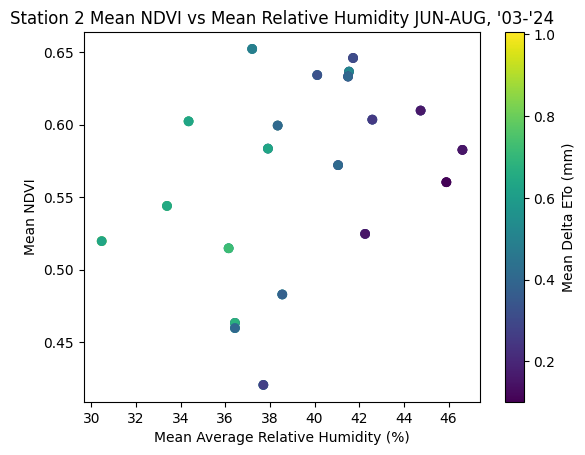

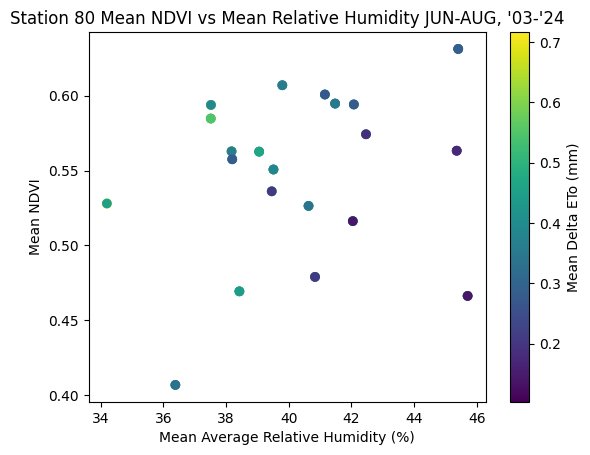

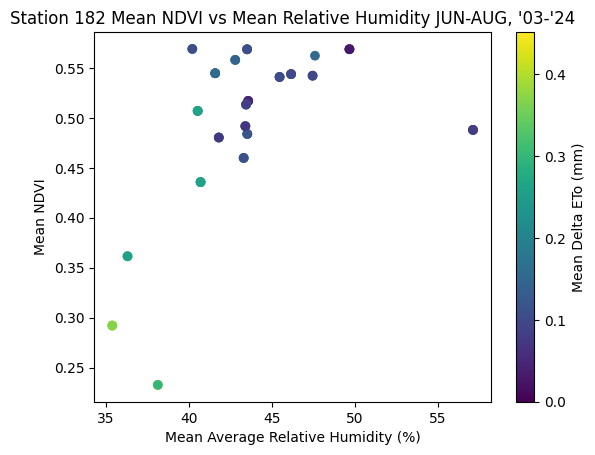

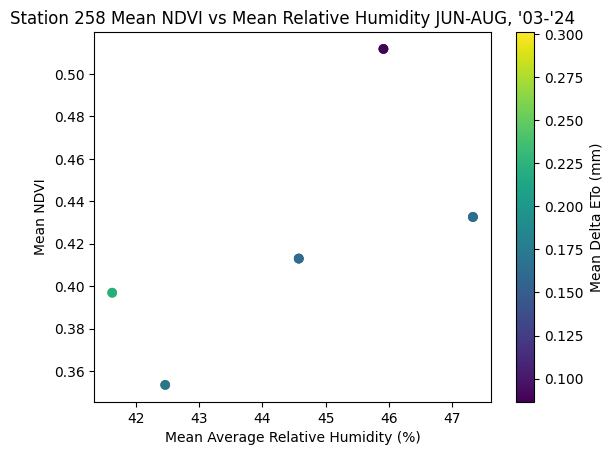

In [34]:
import matplotlib.cm as cm

dir = '/content/CIMIS/CIMIS_Project_Data/CIMIS_daily_corr_data/'

#station_ids = [2, 6, 7, 12, 13, 15, 35, 39, 41, 43, 44, 47, 52, 64, 68, 70, 71, 75, 77, 78, 80, 83, 84, 87, 90, 91, 99, 104, 105, 106, 107, 113, 114, 117, 124, 125, 126, 129, 131, 140, 144, 146, 147, 150, 151, 152, 153, 157, 158, 160, 163, 165, 170, 171, 173, 174, 175, 178, 179, 181, 182, 184, 187, 191, 192, 193, 194, 195, 197, 199, 200, 202, 204, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 229, 235, 236, 237, 240, 241, 242, 243, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 256, 258, 259, 260, 261, 262, 264, 265, 266, 267, 268]
station_ids = [2, 80, 182, 258]

for id in station_ids:
  plt.figure()
  file = f'{dir}station_id{id}_cimis_daily_corr.csv'
  df = pd.read_csv(file)
  df['Date'] = pd.to_datetime(df['Date'])
  df.set_index(pd.to_datetime(df.Date), inplace=True)
  df_jja = df[(df['Date'].dt.month == 6) | (df['Date'].dt.month == 7) | (df['Date'].dt.month == 8)]

  for year in range(2003,2025):

    df_jja_yr = df_jja[(df['Date'].dt.year == year)]
    if not df_jja_yr.empty:
      print(f'{year}: {df_jja_yr.shape}')

      rh_mean = df_jja_yr['RHavg'].mean()
      print(f'rh_mean, {year}: {rh_mean}')
      df_jja_yr.loc[:,'RHavg_mean'] = rh_mean

      ndvi_mean = df_jja_yr['NDVI_interp'].mean()
      df_jja_yr.loc[:,'NDVI_mean'] = ndvi_mean

      #print(df_jja.head(92))

      norm = plt.Normalize(df_jja['d_ETo_avg'].min(), df_jja['d_ETo_avg'].max())
      #cmap = cm.get_cmap('viridis')

      # Create a scatter plot
      plt.scatter(df_jja_yr['RHavg_mean'], df_jja_yr['NDVI_mean'], c=df_jja_yr['d_ETo_avg'], norm=norm)

      # Add labels and title
      plt.xlabel('Mean Average Relative Humidity (%)')
      plt.ylabel('Mean NDVI')
      plt.title(f'Station {id} Mean NDVI vs Mean Relative Humidity JUN-AUG, \'03-\'24')
    else:
      continue
  plt.colorbar(label='Mean Delta ETo (mm)')
plt.show()




<Axes: xlabel='NDVI_interp', ylabel='RHavg'>

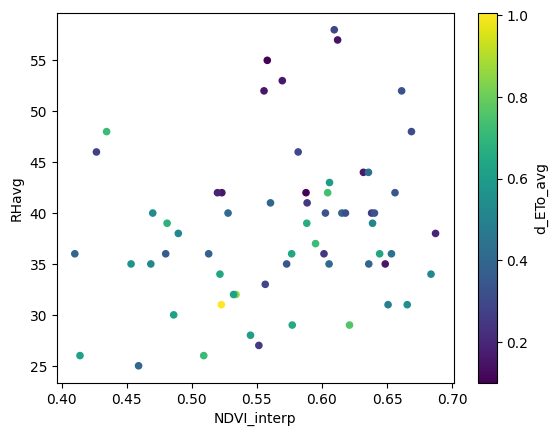

In [5]:
df_jja.plot.scatter(x='NDVI_interp',y='RHavg',c='d_ETo_avg')
